#### Disclaimer: The data were collected from the Taiwan Economic Journal for the years 1999to 2009.
#### Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.
##### Dataset description: It has 96 columns of data
* The first attribute is Y, class label
* X1 Cost of Interest-bearing Debt
* X2 Cash Reinvestment Ratio
* X3 Current Ratio
* X4 Acid Test
* X5 Interest Expenses/Total Revenue
* X6 Total Liability/Equity Ratio
* X7 Liability/Total Assets
* X8 Interest-bearing Debt/Equity
* X9 Contingent Liability/Equity
* X10 Operating Income/Capital
* ...
* X95 Return on Total Asset Growth

#### Task: You will use the Taiwanese Bankruptcy Prediction data set. The dataset correspondsto a classification problem on which you need to make predictions on the basis of whetherthe company can have a risk to bankrupt considering features in the dataset. You are asked to use this data to build Bagging Classifier and Boosting Classifiers model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Python\week6\day1\data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [3]:
df.shape

(6819, 96)

In [4]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [5]:
df.columns=df.columns.str.lower().str.strip().str.replace(' ', '_').str.rstrip(r'[^\w\s]$')
df.columns

Index(['bankrupt?', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_season',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax_

In [6]:
import re

# Simvolu silmək üçün funksiyanı müəyyən edin
def remove_trailing_symbols(column_name):
    return re.sub(r'[^\w\s]+$', '', column_name)

# Sütun adlarını dəyişdirmək
df.columns = [remove_trailing_symbols(col) for col in df.columns]

# Nəticəni çap etmək
print(df.columns)


Index(['bankrupt', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a',
       'net_value_per_share_(b', 'net_value_per_share_(a',
       'net_value_per_share_(c', 'persistent_eps_in_the_last_four_season',
       'cash_flow_per_share', 'revenue_per_share_(yuan_',
       'operating_profit_per_share_(yuan_',
       'per_share_net_profit_before_tax_(yuan_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax_net_profit_g

In [7]:
df

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a,net_value_per_share_(b,net_value_per_share_(a,net_value_per_share_(c,persistent_eps_in_the_last_four_season,cash_flow_per_share,revenue_per_share_(yuan_,operating_profit_per_share_(yuan_,per_share_net_profit_before_tax_(yuan_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_,net_worth/asset,long-term_fund_suitability_ratio_(a,borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_day,inventory_turnover_rate_(times,fixed_assets_turnover_frequency,net_worth_turnover_rate_(times,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_asset,quick_assets/total_asset,current_assets/total_asset,cash/total_asset,quick_assets/current_liability,cash/current_liability,current_liability_to_asset,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_asset,retained_earnings_to_total_asset,total_income/total_expense,total_expense/asset,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sale,fixed_assets_to_asset,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_asset,cash_flow_to_liability,cfo_to_asset,cash_flow_to_equity,current_liability_to_current_asset,liability-assets_flag,net_income_to_total_asset,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sale,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl,interest_coverage_ratio_(interest_expense_to_ebit,net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0

### Checking the missing values

In [8]:
df.isnull().sum()

bankrupt                                                   0
roa(c)_before_interest_and_depreciation_before_interest    0
roa(a)_before_interest_and_%_after_tax                     0
roa(b)_before_interest_and_depreciation_after_tax          0
operating_gross_margin                                     0
realized_sales_gross_margin                                0
operating_profit_rate                                      0
pre-tax_net_interest_rate                                  0
after-tax_net_interest_rate                                0
non-industry_income_and_expenditure/revenue                0
continuous_interest_rate_(after_tax                        0
operating_expense_rate                                     0
research_and_development_expense_rate                      0
cash_flow_rate                                             0
interest-bearing_debt_interest_rate                        0
tax_rate_(a                                                0
net_value_per_share_(b  

#### Checking the duplicated values

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a,net_value_per_share_(b,net_value_per_share_(a,net_value_per_share_(c,persistent_eps_in_the_last_four_season,cash_flow_per_share,revenue_per_share_(yuan_,operating_profit_per_share_(yuan_,per_share_net_profit_before_tax_(yuan_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_,net_worth/asset,long-term_fund_suitability_ratio_(a,borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_day,inventory_turnover_rate_(times,fixed_assets_turnover_frequency,net_worth_turnover_rate_(times,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_asset,quick_assets/total_asset,current_assets/total_asset,cash/total_asset,quick_assets/current_liability,cash/current_liability,current_liability_to_asset,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_asset,retained_earnings_to_total_asset,total_income/total_expense,total_expense/asset,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sale,fixed_assets_to_asset,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_asset,cash_flow_to_liability,cfo_to_asset,cash_flow_to_equity,current_liability_to_current_asset,liability-assets_flag,net_income_to_total_asset,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sale,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl,interest_coverage_ratio_(interest_expense_to_ebit,net_income_flag,equity_to_liability


### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

In [12]:
df['bankrupt'].value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

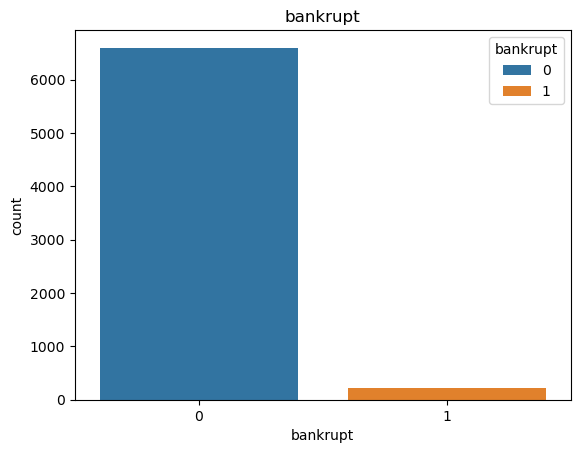

In [13]:
sns.countplot(x=df['bankrupt'], hue=df['bankrupt'])
plt.title('bankrupt')
plt.show()

In [14]:
df.select_dtypes(include='int64')

,bankrupt,liability-assets_flag,net_income_flag
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
6814,0,0,1
6815,0,0,1
6816,0,0,1
6817,0,0,1


In [15]:
df['liability-assets_flag'].value_counts()

liability-assets_flag
0    6811
1       8
Name: count, dtype: int64

In [16]:
df[df['liability-assets_flag'] == 1]

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a,net_value_per_share_(b,net_value_per_share_(a,net_value_per_share_(c,persistent_eps_in_the_last_four_season,cash_flow_per_share,revenue_per_share_(yuan_,operating_profit_per_share_(yuan_,per_share_net_profit_before_tax_(yuan_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_,net_worth/asset,long-term_fund_suitability_ratio_(a,borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_day,inventory_turnover_rate_(times,fixed_assets_turnover_frequency,net_worth_turnover_rate_(times,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_asset,quick_assets/total_asset,current_assets/total_asset,cash/total_asset,quick_assets/current_liability,cash/current_liability,current_liability_to_asset,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_asset,retained_earnings_to_total_asset,total_income/total_expense,total_expense/asset,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sale,fixed_assets_to_asset,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_asset,cash_flow_to_liability,cfo_to_asset,cash_flow_to_equity,current_liability_to_current_asset,liability-assets_flag,net_income_to_total_asset,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sale,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl,interest_coverage_ratio_(interest_expense_to_ebit,net_income_flag,equity_to_liability
56,1,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,2.766025e-04,1.150000e+08,0.458264,3.990399e-04,0.0,0.120012,0.120012,0.120012,0.084239,0.308481,0.045843,0.066200,0.067485,0.022166,0.847569,0.686085,0.686085,0.216971,7.230000e+09,1.542430e-04,0.256152,0.327158,0.004329,0.003309,0.630523,0.126572,0.321371,0.678629,0.004902,0.262035,0.000633,0.066996,0.072453,0.351419,0.292354,0.001311,0.004827,5.042417e-04,6.990039e-04,0.161613,0.048053,0.370209,0.009526,0.692375,0.566755,0.604127,0.210915,4.004091e-03,0.004437,0.252298,0.333539,0.276830,1.196316e-03,0.754574,0.762552,0.241053,0.011706,0.841966,0.002003,0.203706,7.630000e+09,7.650000e+09,0.593893,8.190000e+09,0.671591,0.222815,0.754574,0.241053,0.025851,0.705153,0.464287,0.491813,0.240450,0.065286,1,0.525651,5.803037e-03,0.623648,0.601857,1.000000,0.182790,0.026763,0.565021,1,0.009178
1869,1,0.392775,0.432239,0.432946,0.586921,0.586921,0.998776,0.797126,0.809068,0.303470,0.781325,8.640000e+09,6.600000e+09,0.461523,2.160216e-04,0.0,0.120180,0.120180,0.120180,0.115061,0.319021,0.093244,0.014820,0.084884,0.020457,0.848062,0.689515,0.689515,0.217608,4.220000e+09,1.649235e-04,0.264689,0.422684,0.005246,0.002870,0.630306,0.378620,0.305378,0.694622,0.004129,0.000000,0.005366,0.014787,0.083787,0.000000,0.157421,0.000528,0.011999,8.220000e+09,3.739368e-03,0.2354

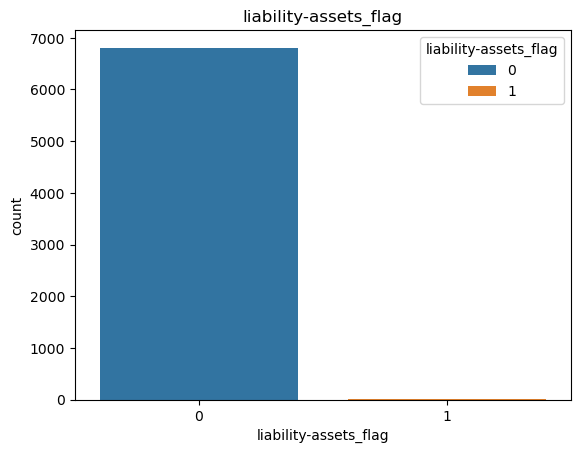

In [17]:
%matplotlib inline
sns.countplot(x=df['liability-assets_flag'], hue=df['liability-assets_flag'])
plt.title('liability-assets_flag')
plt.show()

In [18]:
df['net_income_flag'].value_counts()

net_income_flag
1    6819
Name: count, dtype: int64

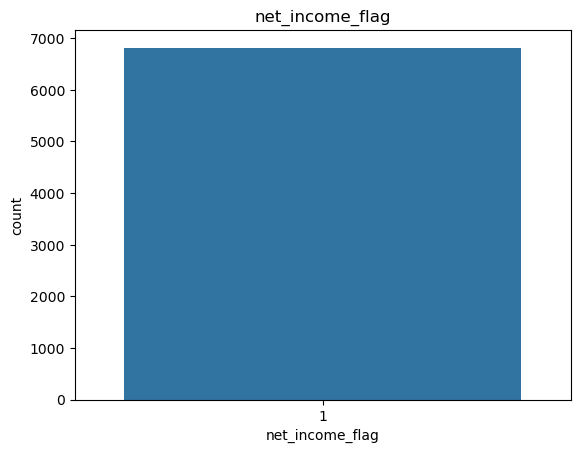

In [19]:
sns.countplot(x=df['net_income_flag'])
plt.title('net_income_flag')
plt.show()

In [20]:
df.drop('net_income_flag', axis=1, inplace=True)

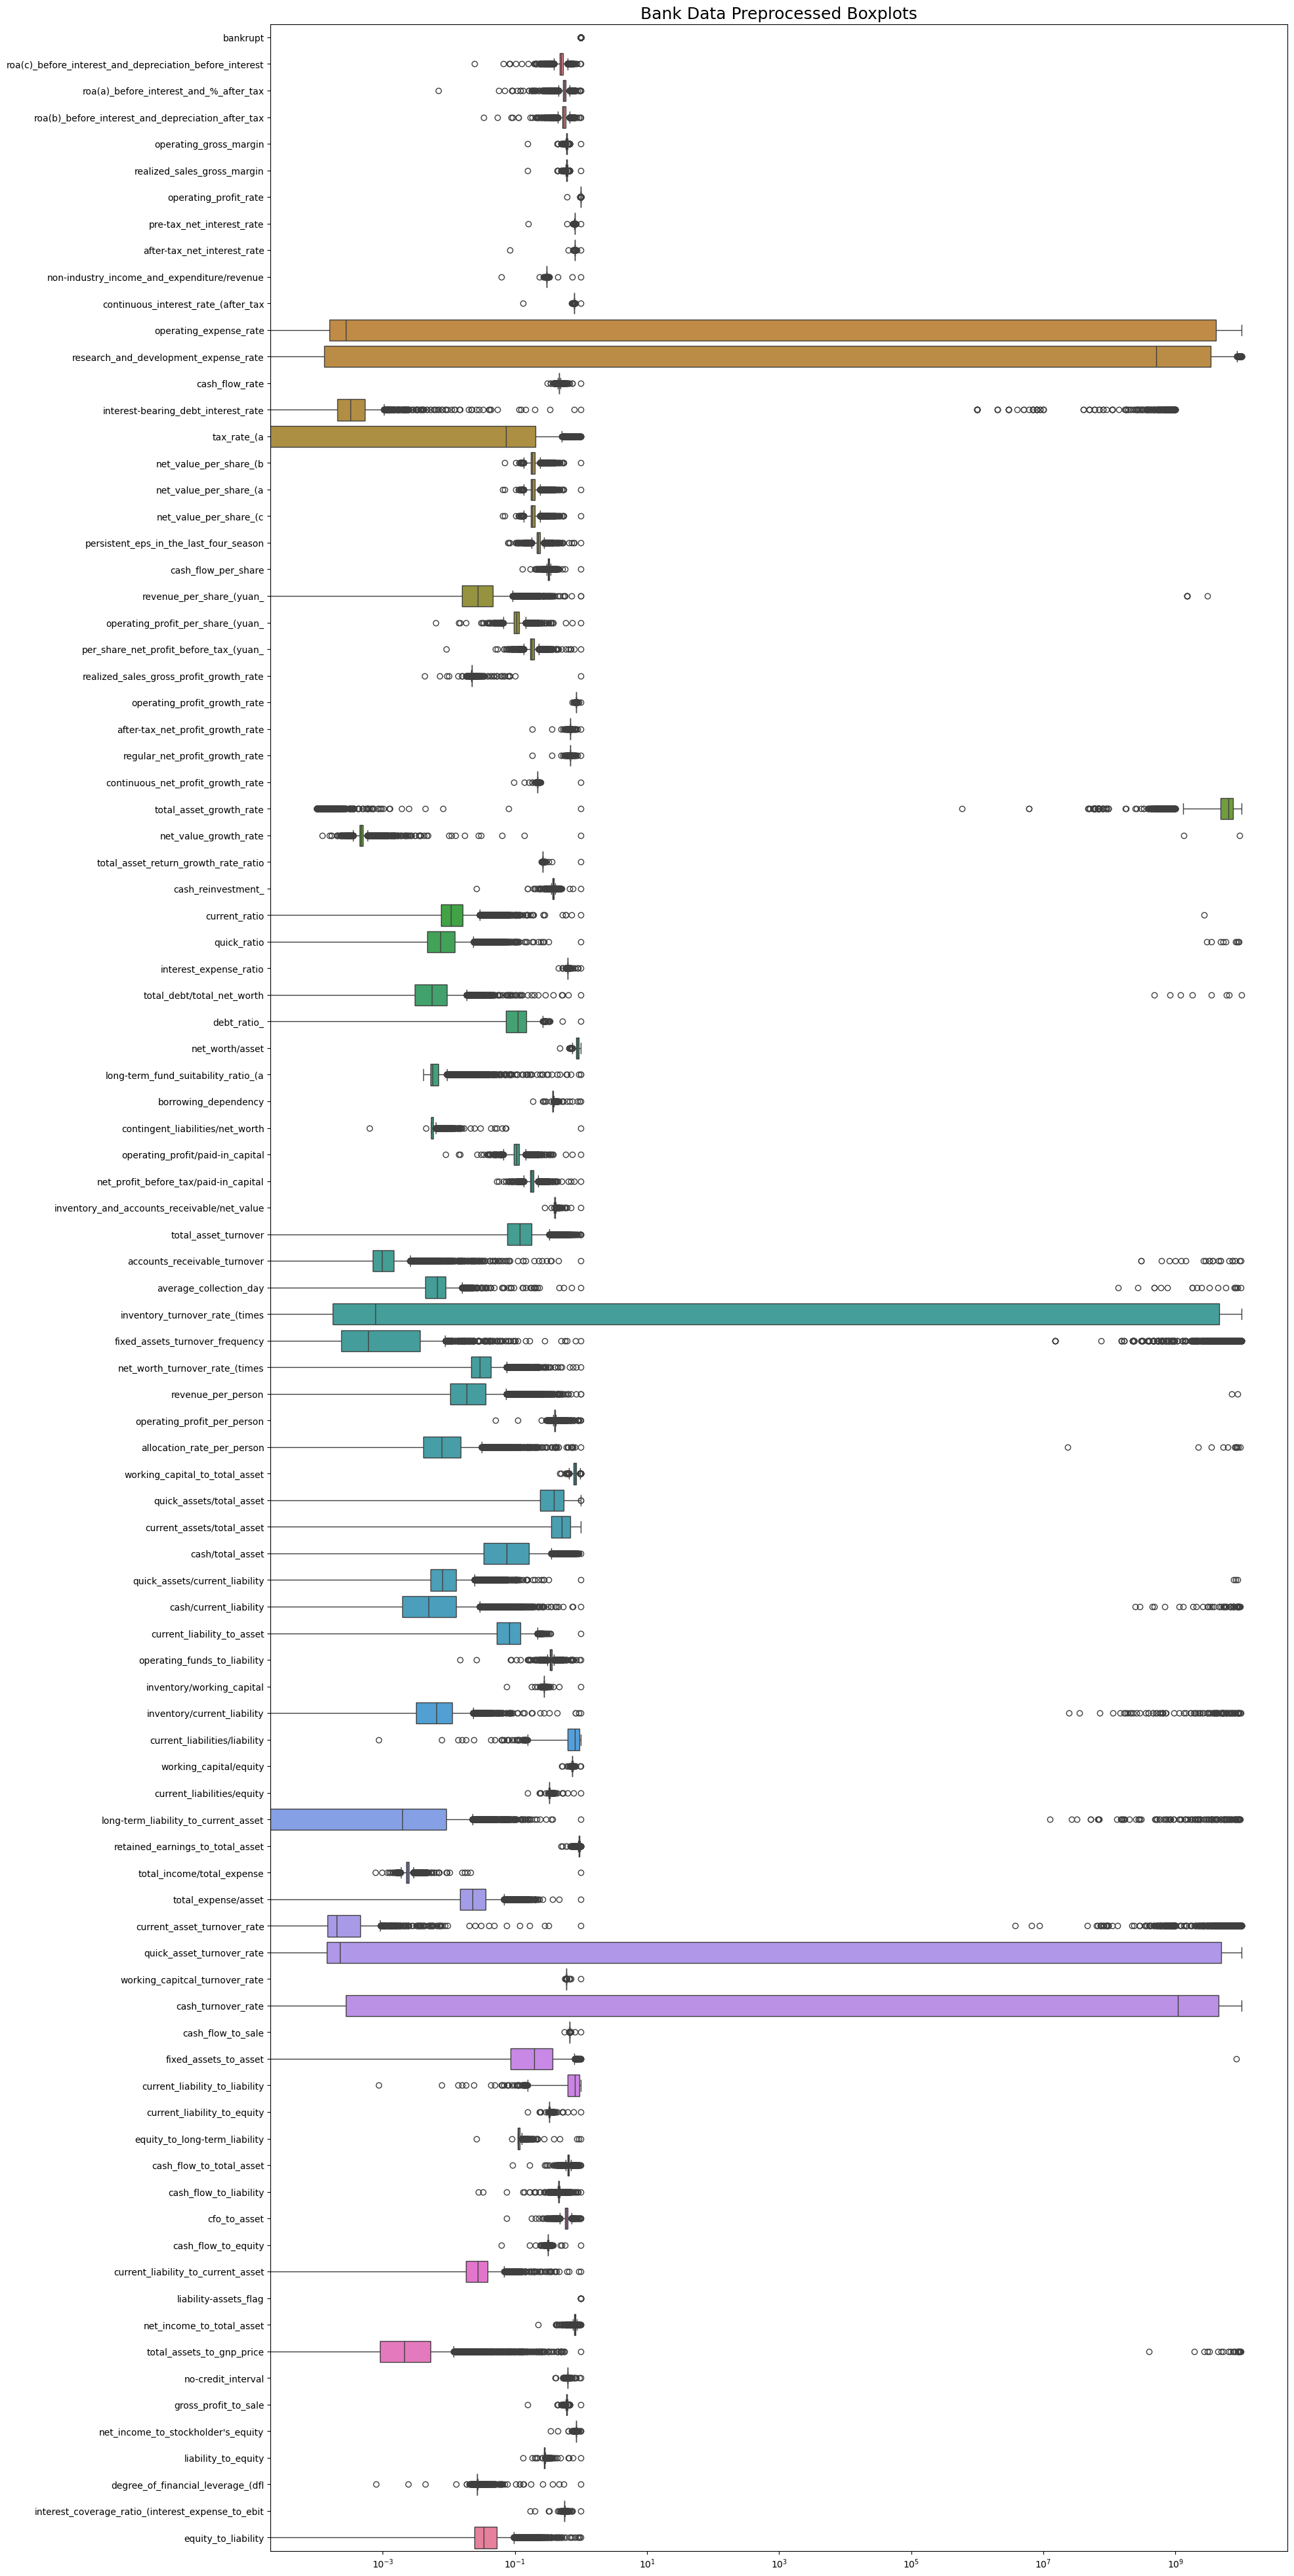

In [21]:
plt.figure(figsize=(20, 50))
ax = sns.boxplot(data=df, orient='h')
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=18)
ax.set(xscale = 'log')
plt.show()

In [22]:
X = df.iloc[:, 1:]
y = df.iloc[:, [0]]

#### Train Test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### RobustScaler

In [24]:
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Bagging Classifier

In [25]:
svm = SVC(probability=True)
bag_svm = BaggingClassifier(estimator=svm,
                       n_estimators=10,
                       max_samples=0.4,
                       max_features=35,
                       bootstrap=True,
                       bootstrap_features=True,
                       random_state=123)

In [26]:
bag_svm_model = bag_svm.fit(X_train, y_train)

In [27]:
bag_svm_pred = bag_svm_model.predict(X_test)

In [28]:
print('confusion  matrix:\n', confusion_matrix(y_test, bag_svm_pred))
print()
print('accuracy: ', accuracy_score(y_test, bag_svm_pred))
print('roc_auc_score: ', roc_auc_score(y_test, bag_svm_pred))
print('f1_score: ', f1_score(y_test, bag_svm_pred))
print('precision_score: ', precision_score(y_test, bag_svm_pred))
print('recall_score: ', recall_score(y_test, bag_svm_pred))
print()
print('classification_report:\n', classification_report(y_test, bag_svm_pred))

confusion  matrix:
 [[1320    0]
 [  44    0]]

accuracy:  0.967741935483871
roc_auc_score:  0.5
f1_score:  0.0
precision_score:  0.0
recall_score:  0.0

classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



In [29]:
rf = RandomForestClassifier()
bag_rf = BaggingClassifier(estimator=rf,
                       n_estimators=10,
                       max_samples=0.4,
                       max_features=35,
                       bootstrap=True,
                       bootstrap_features=True,
                       random_state=123)

In [30]:
bag_rf_model = bag_rf.fit(X_train, y_train)
bag_rf_pred = bag_rf_model.predict(X_test)

In [31]:
print('confusion  matrix:\n', confusion_matrix(y_test, bag_rf_pred))
print()
print('accuracy: ', accuracy_score(y_test, bag_rf_pred))
print('roc_auc_score: ', roc_auc_score(y_test, bag_rf_pred))
print('f1_score: ', f1_score(y_test, bag_rf_pred))
print('precision_score: ', precision_score(y_test, bag_rf_pred))
print('recall_score: ', recall_score(y_test, bag_rf_pred))
print()
print('classification_report:\n', classification_report(y_test, bag_rf_pred))

confusion  matrix:
 [[1318    2]
 [  36    8]]

accuracy:  0.9721407624633431
roc_auc_score:  0.5901515151515152
f1_score:  0.2962962962962963
precision_score:  0.8
recall_score:  0.18181818181818182

classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.80      0.18      0.30        44

    accuracy                           0.97      1364
   macro avg       0.89      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364



## Imbalance Problem
## Undersampling

In [43]:
undersample = NearMiss(version=1, n_neighbors=3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [44]:
y_train_us.value_counts()

bankrupt
0           176
1           176
Name: count, dtype: int64

In [45]:
y_train.value_counts()

bankrupt
0           5279
1            176
Name: count, dtype: int64

In [49]:
X_train_us.shape

(352, 94)

In [50]:
X_train.shape

(5455, 94)

## Bagging Classifier

In [52]:
rf = RandomForestClassifier()
bag_rf_us = BaggingClassifier(estimator=rf,
                       n_estimators=10,
                       max_samples=0.4,
                       max_features=35,
                       bootstrap=True,
                       bootstrap_features=True,
                       random_state=123)

In [54]:
bag_rf_us_model = bag_rf_us.fit(X_train_us, y_train_us)

In [55]:
bag_rf_us_pred = bag_rf_us_model.predict(X_test)

In [56]:
print('confusion  matrix:\n', confusion_matrix(y_test, bag_rf_us_pred))
print()
print('accuracy: ', accuracy_score(y_test, bag_rf_us_pred))
print('roc_auc_score: ', roc_auc_score(y_test, bag_rf_us_pred))
print('f1_score: ', f1_score(y_test, bag_rf_us_pred))
print('precision_score: ', precision_score(y_test, bag_rf_us_pred))
print('recall_score: ', recall_score(y_test, bag_rf_us_pred))
print()
print('classification_report:\n', classification_report(y_test, bag_rf_us_pred))

confusion  matrix:
 [[906 414]
 [  2  42]]

accuracy:  0.6950146627565983
roc_auc_score:  0.8204545454545454
f1_score:  0.168
precision_score:  0.09210526315789473
recall_score:  0.9545454545454546

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81      1320
           1       0.09      0.95      0.17        44

    accuracy                           0.70      1364
   macro avg       0.54      0.82      0.49      1364
weighted avg       0.97      0.70      0.79      1364



## Boosting Models

In [60]:
gbc = GradientBoostingClassifier(random_state=0)
gbc_model = gbc.fit(X_train_us, y_train_us)
gbc_pred = gbc_model.predict(X_test)

In [61]:
print('confusion  matrix:\n', confusion_matrix(y_test, gbc_pred))
print()
print('accuracy: ', accuracy_score(y_test, gbc_pred))
print('roc_auc_score: ', roc_auc_score(y_test, gbc_pred))
print('f1_score: ', f1_score(y_test, gbc_pred))
print('precision_score: ', precision_score(y_test, gbc_pred))
print('recall_score: ', recall_score(y_test, gbc_pred))
print()
print('classification_report:\n', classification_report(y_test, gbc_pred))

confusion  matrix:
 [[752 568]
 [  0  44]]

accuracy:  0.5835777126099707
roc_auc_score:  0.7848484848484849
f1_score:  0.13414634146341464
precision_score:  0.0718954248366013
recall_score:  1.0

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73      1320
           1       0.07      1.00      0.13        44

    accuracy                           0.58      1364
   macro avg       0.54      0.78      0.43      1364
weighted avg       0.97      0.58      0.71      1364



In [62]:
xgbt = XGBClassifier()
xgbt_model = xgbt.fit(X_train_us, y_train_us)
xgbt_pred = xgbt_model.predict(X_test)

In [63]:
print('confusion  matrix:\n', confusion_matrix(y_test, xgbt_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgbt_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgbt_pred))
print('f1_score: ', f1_score(y_test, xgbt_pred))
print('precision_score: ', precision_score(y_test, xgbt_pred))
print('recall_score: ', recall_score(y_test, xgbt_pred))
print()
print('classification_report:\n', classification_report(y_test, xgbt_pred))

confusion  matrix:
 [[829 491]
 [  0  44]]

accuracy:  0.6400293255131965
roc_auc_score:  0.8140151515151515
f1_score:  0.15198618307426598
precision_score:  0.08224299065420561
recall_score:  1.0

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      1320
           1       0.08      1.00      0.15        44

    accuracy                           0.64      1364
   macro avg       0.54      0.81      0.46      1364
weighted avg       0.97      0.64      0.75      1364



## Oversampling

In [64]:
ros = RandomOverSampler(random_state=0)
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [65]:
y_train.value_counts()

bankrupt
0           5279
1            176
Name: count, dtype: int64

In [66]:
y_train_os.value_counts()

bankrupt
0           5279
1           5279
Name: count, dtype: int64

## Bagging Classifier

In [69]:
rf = RandomForestClassifier()
bag_rf_os = BaggingClassifier(estimator=rf,
                       n_estimators=10,
                       max_samples=0.4,
                       max_features=35,
                       bootstrap=True,
                       bootstrap_features=True,
                       random_state=123)

bag_rf_os_model = bag_rf_os.fit(X_train_os, y_train_os)

In [70]:
bag_rf_os_pred = bag_rf_os_model.predict(X_test)

In [71]:
print('confusion  matrix:\n', confusion_matrix(y_test, bag_rf_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, bag_rf_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, bag_rf_os_pred))
print('f1_score: ', f1_score(y_test, bag_rf_os_pred))
print('precision_score: ', precision_score(y_test, bag_rf_os_pred))
print('recall_score: ', recall_score(y_test, bag_rf_os_pred))
print()
print('classification_report:\n', classification_report(y_test, bag_rf_os_pred))

confusion  matrix:
 [[1283   37]
 [  15   29]]

accuracy:  0.9618768328445748
roc_auc_score:  0.815530303030303
f1_score:  0.5272727272727272
precision_score:  0.4393939393939394
recall_score:  0.6590909090909091

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.44      0.66      0.53        44

    accuracy                           0.96      1364
   macro avg       0.71      0.82      0.75      1364
weighted avg       0.97      0.96      0.97      1364



## Boosting Models

In [127]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=13, 
                              learning_rate=0.9, 
                              random_state=123)
adb_os_model = adaboost.fit(X_train_os, y_train_os)
adb_os_pred = adb_os_model.predict(X_test)

In [128]:
print('confusion  matrix:\n', confusion_matrix(y_test, adb_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, adb_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, adb_os_pred))
print('f1_score: ', f1_score(y_test, adb_os_pred))
print('precision_score: ', precision_score(y_test, adb_os_pred))
print('recall_score: ', recall_score(y_test, adb_os_pred))
print()
print('classification_report:\n', classification_report(y_test, adb_os_pred))

confusion  matrix:
 [[1190  130]
 [   9   35]]

accuracy:  0.8980938416422287
roc_auc_score:  0.8484848484848484
f1_score:  0.3349282296650718
precision_score:  0.21212121212121213
recall_score:  0.7954545454545454

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.21      0.80      0.33        44

    accuracy                           0.90      1364
   macro avg       0.60      0.85      0.64      1364
weighted avg       0.97      0.90      0.93      1364



In [72]:
gbc = GradientBoostingClassifier(random_state=0)
gbc_os_model = gbc.fit(X_train_os, y_train_os)
gbc_os_pred = gbc_os_model.predict(X_test)

In [73]:
print('confusion  matrix:\n', confusion_matrix(y_test, gbc_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, gbc_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, gbc_os_pred))
print('f1_score: ', f1_score(y_test, gbc_os_pred))
print('precision_score: ', precision_score(y_test, gbc_os_pred))
print('recall_score: ', recall_score(y_test, gbc_os_pred))
print()
print('classification_report:\n', classification_report(y_test, gbc_os_pred))

confusion  matrix:
 [[1246   74]
 [   9   35]]

accuracy:  0.9391495601173021
roc_auc_score:  0.8696969696969697
f1_score:  0.45751633986928103
precision_score:  0.3211009174311927
recall_score:  0.7954545454545454

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1320
           1       0.32      0.80      0.46        44

    accuracy                           0.94      1364
   macro avg       0.66      0.87      0.71      1364
weighted avg       0.97      0.94      0.95      1364



In [75]:
xgbt = XGBClassifier()
xgbt_os_model = xgbt.fit(X_train_os, y_train_os)
xgbt_os_pred = xgbt_os_model.predict(X_test)

In [76]:
print('confusion  matrix:\n', confusion_matrix(y_test, xgbt_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgbt_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgbt_os_pred))
print('f1_score: ', f1_score(y_test, xgbt_os_pred))
print('precision_score: ', precision_score(y_test, xgbt_os_pred))
print('recall_score: ', recall_score(y_test, xgbt_os_pred))
print()
print('classification_report:\n', classification_report(y_test, xgbt_os_pred))

confusion  matrix:
 [[1303   17]
 [  21   23]]

accuracy:  0.9721407624633431
roc_auc_score:  0.7549242424242424
f1_score:  0.5476190476190477
precision_score:  0.575
recall_score:  0.5227272727272727

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.57      0.52      0.55        44

    accuracy                           0.97      1364
   macro avg       0.78      0.75      0.77      1364
weighted avg       0.97      0.97      0.97      1364



In [100]:
xgbt = XGBClassifier(n_estimators=13, learning_rate=0.9)
xgbt_os_model = xgbt.fit(X_train_os, y_train_os)
xgbt_os_pred = xgbt_os_model.predict(X_test)

In [103]:
print('confusion  matrix:\n', confusion_matrix(y_test, xgbt_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgbt_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgbt_os_pred))
print('f1_score: ', f1_score(y_test, xgbt_os_pred))
print('precision_score: ', precision_score(y_test, xgbt_os_pred))
print('recall_score: ', recall_score(y_test, xgbt_os_pred))
print()
print('classification_report:\n', classification_report(y_test, xgbt_os_pred))

confusion  matrix:
 [[1293   27]
 [  17   27]]

accuracy:  0.967741935483871
roc_auc_score:  0.7965909090909091
f1_score:  0.5510204081632653
precision_score:  0.5
recall_score:  0.6136363636363636

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1320
           1       0.50      0.61      0.55        44

    accuracy                           0.97      1364
   macro avg       0.74      0.80      0.77      1364
weighted avg       0.97      0.97      0.97      1364



## OverSampling with " scale_pos_weight" papameters

In [105]:
df.bankrupt.value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

In [120]:
xgbt = XGBClassifier(n_estimators=13, 
                     learning_rate=0.9, 
                     scale_pos_weight = df.bankrupt.value_counts()[0]/df.bankrupt.value_counts()[1])
xgbt_model = xgbt.fit(X_train, y_train)
xgbt_pred = xgbt_model.predict(X_test)

In [122]:
print('confusion  matrix:\n', confusion_matrix(y_test, xgbt_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgbt_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgbt_pred))
print('f1_score: ', f1_score(y_test, xgbt_pred))
print('precision_score: ', precision_score(y_test, xgbt_pred))
print('recall_score: ', recall_score(y_test, xgbt_pred))
print()
print('classification_report:\n', classification_report(y_test, xgbt_pred))

confusion  matrix:
 [[1294   26]
 [  18   26]]

accuracy:  0.967741935483871
roc_auc_score:  0.7856060606060606
f1_score:  0.5416666666666666
precision_score:  0.5
recall_score:  0.5909090909090909

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1320
           1       0.50      0.59      0.54        44

    accuracy                           0.97      1364
   macro avg       0.74      0.79      0.76      1364
weighted avg       0.97      0.97      0.97      1364



In [143]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier(learning_rate=1, 
                          random_state=42, 
                          iterations = 2, 
                          depth=2)
catb_os_model = catb.fit(X_train_os, y_train_os)
catb_os_pred = catb_os_model.predict(X_test)

0:	learn: 0.3731840	total: 27.9ms	remaining: 27.9ms
1:	learn: 0.3310092	total: 50.1ms	remaining: 0us


In [144]:
print('confusion  matrix:\n', confusion_matrix(y_test, catb_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, catb_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, catb_os_pred))
print('f1_score: ', f1_score(y_test, catb_os_pred))
print('precision_score: ', precision_score(y_test, catb_os_pred))
print('recall_score: ', recall_score(y_test, catb_os_pred))
print()
print('classification_report:\n', classification_report(y_test, catb_os_pred))

confusion  matrix:
 [[1066  254]
 [   6   38]]

accuracy:  0.8093841642228738
roc_auc_score:  0.8356060606060607
f1_score:  0.2261904761904762
precision_score:  0.13013698630136986
recall_score:  0.8636363636363636

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      1320
           1       0.13      0.86      0.23        44

    accuracy                           0.81      1364
   macro avg       0.56      0.84      0.56      1364
weighted avg       0.97      0.81      0.87      1364



In [145]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_os_model = lgbm.fit(X_train_os, y_train_os)
lgbm_os_pred = lgbm_os_model.predict(X_test)

[LightGBM] [Info] Number of positive: 5279, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23640
[LightGBM] [Info] Number of data points in the train set: 10558, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [146]:
print('confusion  matrix:\n', confusion_matrix(y_test, lgbm_os_pred))
print()
print('accuracy: ', accuracy_score(y_test, lgbm_os_pred))
print('roc_auc_score: ', roc_auc_score(y_test, lgbm_os_pred))
print('f1_score: ', f1_score(y_test, lgbm_os_pred))
print('precision_score: ', precision_score(y_test, lgbm_os_pred))
print('recall_score: ', recall_score(y_test, lgbm_os_pred))
print()
print('classification_report:\n', classification_report(y_test, lgbm_os_pred))

confusion  matrix:
 [[1301   19]
 [  21   23]]

accuracy:  0.9706744868035191
roc_auc_score:  0.7541666666666667
f1_score:  0.5348837209302325
precision_score:  0.5476190476190477
recall_score:  0.5227272727272727

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.55      0.52      0.53        44

    accuracy                           0.97      1364
   macro avg       0.77      0.75      0.76      1364
weighted avg       0.97      0.97      0.97      1364



## OverSampling with " scale_pos_weight" papameters

In [160]:
df.bankrupt.value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

In [161]:
220/6599

0.03333838460372784

In [162]:
1-0.03333838460372784

0.9666616153962722

In [158]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(scale_pos_weight = 0.9666616153962722/0.03333838460372784)
lgbm_model = lgbm.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 176, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032264 -> initscore=-3.401008
[LightGBM] [Info] Start training from score -3.401008


In [159]:
print('confusion  matrix:\n', confusion_matrix(y_test, lgbm_pred))
print()
print('accuracy: ', accuracy_score(y_test, lgbm_pred))
print('roc_auc_score: ', roc_auc_score(y_test, lgbm_pred))
print('f1_score: ', f1_score(y_test, lgbm_pred))
print('precision_score: ', precision_score(y_test, lgbm_pred))
print('recall_score: ', recall_score(y_test, lgbm_pred))
print()
print('classification_report:\n', classification_report(y_test, lgbm_pred))

confusion  matrix:
 [[1303   17]
 [  22   22]]

accuracy:  0.9714076246334311
roc_auc_score:  0.7435606060606059
f1_score:  0.5301204819277109
precision_score:  0.5641025641025641
recall_score:  0.5

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.56      0.50      0.53        44

    accuracy                           0.97      1364
   macro avg       0.77      0.74      0.76      1364
weighted avg       0.97      0.97      0.97      1364



In [156]:
220/6599

0.03333838460372784

In [157]:
1-0.03333838460372784

0.9666616153962722